In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from anyio.streams import file

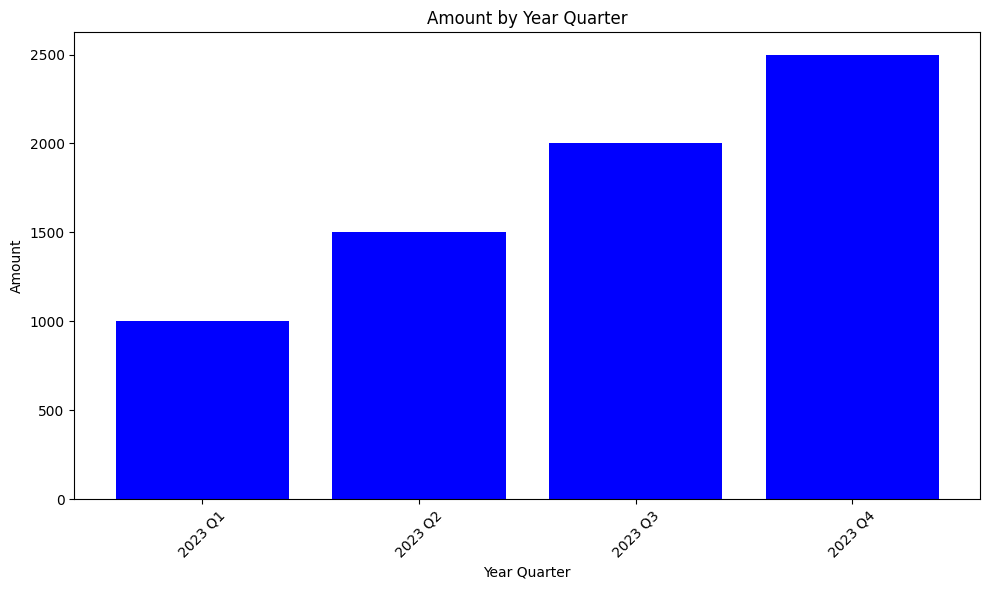

In [2]:
data = {
    'Year': [2023, 2023, 2023, 2023],
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Amount': [1000, 1500, 2000, 2500]
}
df = pd.DataFrame(data)

# Step 3: Combine Year and Quarter for the x-axis
df['Year_Quarter'] = df['Year'].astype(str) + ' ' + df['Quarter']

# Step 4: Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Year_Quarter'], df['Amount'], color='blue')
plt.xlabel('Year Quarter')
plt.ylabel('Amount')
plt.title('Amount by Year Quarter')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better fit
plt.show()

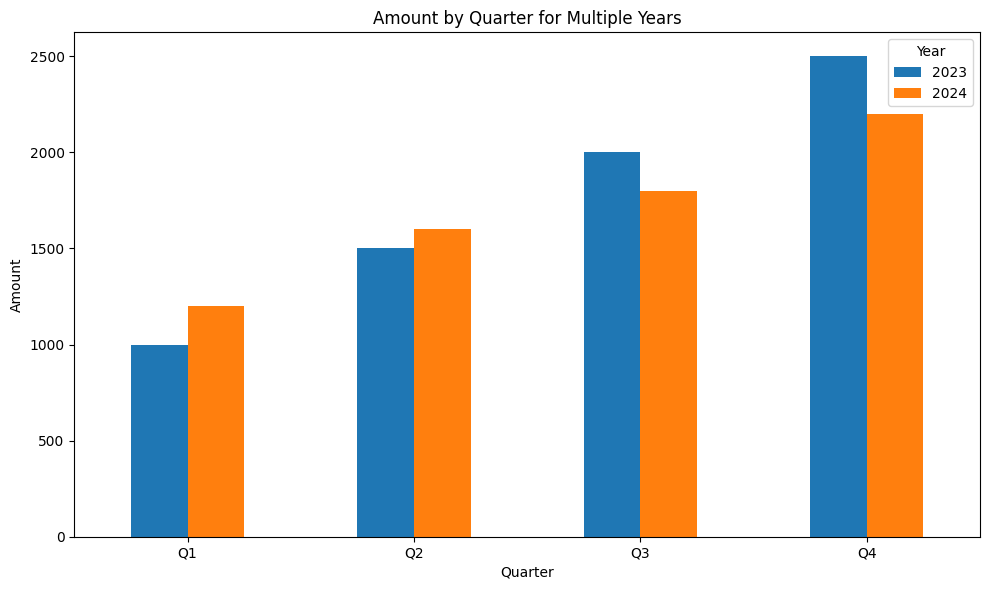

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Create a sample DataFrame with multiple years
data = {
    'Year': [2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024],
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q4', 'Q1', 'Q2', 'Q3', 'Q4'],
    'Amount': [1000, 1500, 2000, 2500, 1200, 1600, 1800, 2200]
}
df = pd.DataFrame(data)

# Step 3: Pivot the DataFrame for grouped bar chart
pivot_df = df.pivot(index='Quarter', columns='Year', values='Amount').fillna(0)

# Step 4: Plotting
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Quarter')
plt.ylabel('Amount')
plt.title('Amount by Quarter for Multiple Years')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()  # Adjust layout for better fit
plt.show()

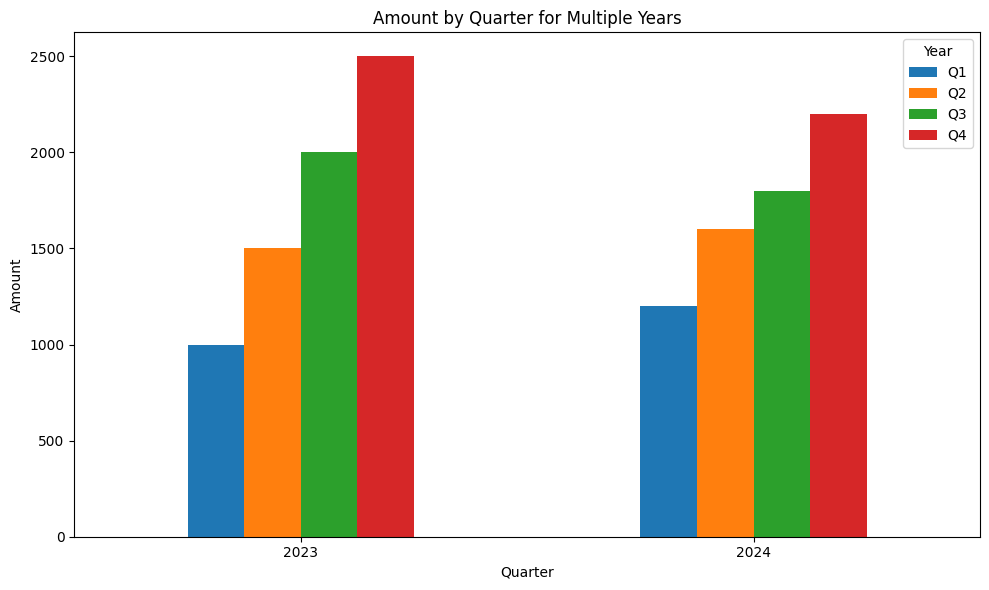

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Create a sample DataFrame with multiple years
data = {
    'Year': [2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024],
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q4', 'Q1', 'Q2', 'Q3', 'Q4'],
    'Amount': [1000, 1500, 2000, 2500, 1200, 1600, 1800, 2200]
}
df = pd.DataFrame(data)


# Step 3: Pivot the DataFrame for grouped bar chart
pivot_df = df.pivot(index='Year', columns='Quarter', values='Amount').fillna(0)

# Step 4: Plotting
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Quarter')
plt.ylabel('Amount')
plt.title('Amount by Quarter for Multiple Years')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()  # Adjust layout for better fit
plt.show()

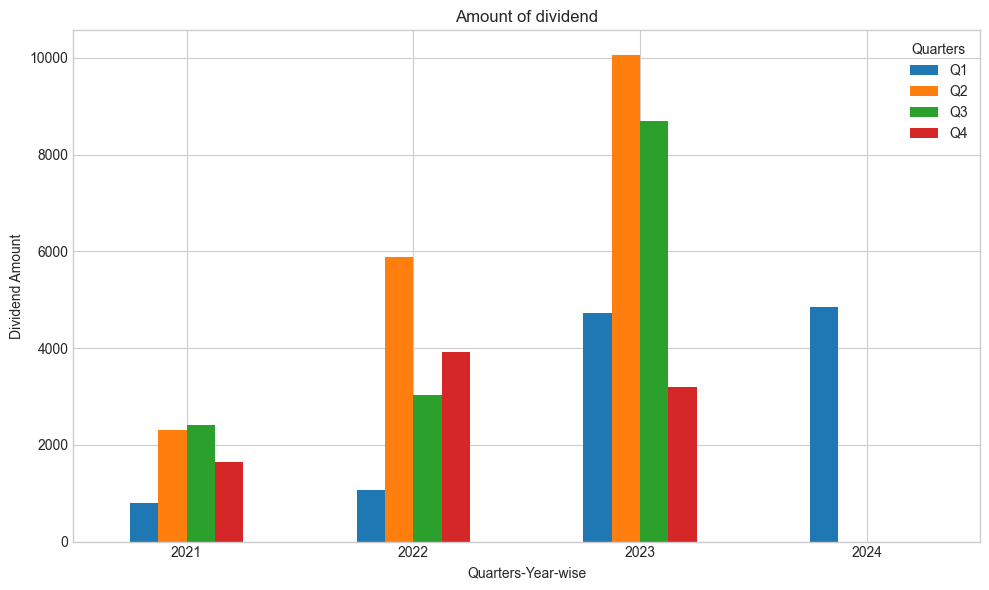

In [5]:
conn = None
cursor = None

#establishing the connection
conn = psycopg2.connect(
    database="mydatabase", user="postgres", password="password", host="localhost", port= 5432
)

cursor = conn.cursor()
cursor.execute("select * from wealthmanager.dividendmaster")
result = cursor.fetchall()
df = pd.DataFrame.from_records(result, columns=[x[0] for x in cursor.description])

df["yearText"] = df["dividendyear"].astype(str)
df["quarterText"] = df["quarter"].map({1: 'Q1', 2: 'Q2', 3: 'Q3', 4:'Q4'}) 
temp = df[['yearText' ,'quarterText','dividendamount']]
temp = temp.rename(columns={'yearText': 'year', 'quarterText': 'quarter'})

#the trick lies in resetting the index which flattens the structure
temp = temp.groupby(['year', 'quarter']).sum('dividendamount').apply(list).reset_index()
list(temp['year'])
list(temp['quarter'])
list(temp['dividendamount'])

data = {
    'Year': list(temp['year']),
    'Quarter':list(temp['quarter']),
    'Amount': list(temp['dividendamount'])
}

#data
df = pd.DataFrame(data)
pivot_df = df.pivot(index='Year', columns='Quarter', values='Amount').fillna(0)

# Step 4: Plotting
plt.style.use("seaborn-v0_8-whitegrid")
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Quarters-Year-wise')
plt.ylabel('Dividend Amount')
plt.title('Amount of dividend')
plt.xticks(rotation=0)
plt.legend(title='Quarters')

plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [6]:
pivot_df

Quarter,Q1,Q2,Q3,Q4
Year,,,,
2021,794.0,2299.00,2419.0,1643.0
2022,1059.0,5878.25,3020.0,3924.0
2023,4721.2,10064.80,8702.0,3199.0
2024,4841.0,0.00,0.0,0.0


In [7]:
pivot_df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4'], dtype='object', name='Quarter')

In [8]:
#pivot_df("Year","Quarter")

for item in pivot_df.columns:
    print(pivot_df[item])

Year
2021     794.0
2022    1059.0
2023    4721.2
2024    4841.0
Name: Q1, dtype: float64
Year
2021     2299.00
2022     5878.25
2023    10064.80
2024        0.00
Name: Q2, dtype: float64
Year
2021    2419.0
2022    3020.0
2023    8702.0
2024       0.0
Name: Q3, dtype: float64
Year
2021    1643.0
2022    3924.0
2023    3199.0
2024       0.0
Name: Q4, dtype: float64
